In [3]:
# Loading Packages
library(chest)
library(autoReg)
library(tidyverse)
library(JMbayes2)
library(ggpubr)
library(dlookr)
library(visdat)
library(compareGroups)
library(gtsummary)
library(here)
library(openxlsx)
library(broom)
library(glmnet)
library(randomForestSRC)
library(randomForest)
library(gbm)
library(survival)
library(mice)
library(VIM)
library(naniar)
library(forcats)
library(caret)
library(VGAM)
library(timeROC)
library(car)
library(mgcv)
library(lmtest)
library(ggplot2)
library(flextable)

Registered S3 method overwritten by 'tidycmprsk':
  method                    from     
  global_pvalue_fun.tidycrr gtsummary

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: survival

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


Loading required package: GLMMadaptive

Loading required package: splines

Registered S3 methods overwritten by 'dlookr':
  method          from  
  plot.transform  scales
  print.tra

# code for figure 2

In [ ]:
## xixi cohort ##

# Loading Data
load("C:/path/data9.Rdata")
# Data Preparation
df_final_surv$IIR_3revi <- as.numeric(df_final_surv$IIR_3revi)
df_final_surv$time1 <- as.numeric(df_final_surv$time1) 

breaks <- c(-Inf, 30, 60, 90, Inf)
df_final_long$B16_group <- cut(df_final_long$B16, breaks = breaks, labels = FALSE, include.lowest = TRUE)
df_final_long$B16_group <- addNA(df_final_long$B16_group)
df_final_long$B16_group <- as.integer(df_final_long$B16_group)
df_final_long <- df_final_long %>% 
   select(-B16)

In [11]:
# Fitting Models
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_final_surv)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [12]:
# AUROC Calculation
# tvROC,jmFitcox3.12,Thoriz = 5
jmFitcox3.12_roc15 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_roc25 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_roc35 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_roc45 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_roc15))
print(tvAUC(jmFitcox3.12_roc25))
print(tvAUC(jmFitcox3.12_roc35))
print(tvAUC(jmFitcox3.12_roc45))


	Time-dependent AUC for the Joint Model jmFitcox3.12

Estimated AUC: 0.8932
At time: 5
Using information up to time: 1 (3331 subjects still at risk)


	Time-dependent AUC for the Joint Model jmFitcox3.12

Estimated AUC: 0.9079
At time: 5
Using information up to time: 2 (3156 subjects still at risk)


	Time-dependent AUC for the Joint Model jmFitcox3.12

Estimated AUC: 0.9159
At time: 5
Using information up to time: 3 (2910 subjects still at risk)


	Time-dependent AUC for the Joint Model jmFitcox3.12

Estimated AUC: 0.9314
At time: 5
Using information up to time: 4 (2612 subjects still at risk)



In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 6
jmFitcox3.12_roc16 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_roc26 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_roc36 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_roc46 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_roc16))
print(tvAUC(jmFitcox3.12_roc26))
print(tvAUC(jmFitcox3.12_roc36))
print(tvAUC(jmFitcox3.12_roc46))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 7
jmFitcox3.12_roc17 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_roc27 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_roc37 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_roc47 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_roc17))
print(tvAUC(jmFitcox3.12_roc27))
print(tvAUC(jmFitcox3.12_roc37))
print(tvAUC(jmFitcox3.12_roc47))

In [ ]:
# Calibration Plot
# cal，jmFitcox3.12,Thoriz = 5
jmFitcox3.12_cp15 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_cp25 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_cp35 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_cp45 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 5)

# cal，jmFitcox3.12,Thoriz = 6
jmFitcox3.12_cp16 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_cp26 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_cp36 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_cp46 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 6)

# cal，jmFitcox3.12,Thoriz = 7
jmFitcox3.12_cp17 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_cp27 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_cp37 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_cp47 <- calibration_plot(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 7)

# code for figure 3

In [ ]:
## ditan cohort ##
# Loading Data
load("ditan.data1.Rdata")
# Data Preparation
ditan_final_surv$IIR_3revi <- as.numeric(ditan_final_surv$IIR_3revi)
ditan_final_surv$time1.new <- as.numeric(ditan_final_surv$time1.new)

In [ ]:
# Fitting Models
CoxFit_ditan <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = ditan_final_surv)
lmeFit1_ditan <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = ditan_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2_ditan <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = ditan_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12_ditan <- jm(CoxFit_ditan, list(lmeFit1_ditan, lmeFit2_ditan), time_var = "follow.up.years")

In [ ]:
# AUROC Calculation
# tvROC,jmFitcox3.12_ditan,Thoriz = 5
jmFitcox3.12_ditan_roc15 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_ditan_roc25 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_ditan_roc35 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_ditan_roc45 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_ditan_roc15))
print(tvAUC(jmFitcox3.12_ditan_roc25))
print(tvAUC(jmFitcox3.12_ditan_roc35))
print(tvAUC(jmFitcox3.12_ditan_roc45))

In [ ]:
# tvROC,jmFitcox3.12_ditan,Thoriz = 6
jmFitcox3.12_ditan_roc16 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_ditan_roc26 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_ditan_roc36 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_ditan_roc46 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_ditan_roc16))
print(tvAUC(jmFitcox3.12_ditan_roc26))
print(tvAUC(jmFitcox3.12_ditan_roc36))
print(tvAUC(jmFitcox3.12_ditan_roc46))

In [ ]:
# tvROC,jmFitcox3.12_ditan,Thoriz = 7
jmFitcox3.12_ditan_roc17 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_ditan_roc27 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_ditan_roc37 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_ditan_roc47 <- tvROC(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_ditan_roc17))
print(tvAUC(jmFitcox3.12_ditan_roc27))
print(tvAUC(jmFitcox3.12_ditan_roc37))
print(tvAUC(jmFitcox3.12_ditan_roc47))

In [ ]:
# Calibration Plot
# cal，jmFitcox3.12_ditan,Thoriz = 5
jmFitcox3.12_ditan_cp15 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_ditan_cp25 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_ditan_cp35 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_ditan_cp45 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 5)

# cal，jmFitcox3.12_ditan,Thoriz = 6
jmFitcox3.12_ditan_cp16 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_ditan_cp26 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_ditan_cp36 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_ditan_cp46 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 6)

# cal，jmFitcox3.12_ditan,Thoriz = 7
jmFitcox3.12_ditan_cp17 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_ditan_cp27 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_ditan_cp37 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_ditan_cp47 <- calibration_plot(jmFitcox3.12_ditan, newdata = ditan_final_long, Tstart = 4, Thoriz = 7)

In [ ]:
## youan cohort ##
# Loading Data
load("youan.data1.Rdata")
# Data Preparation
youan_final_surv$IIR_3revi <- as.numeric(youan_final_surv$IIR_3revi)
youan_final_surv$time1.new <- as.numeric(youan_final_surv$time1.new)

In [ ]:
# Fitting Models
CoxFit_youan <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = youan_final_surv)
lmeFit1_youan <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = youan_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2_youan <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = youan_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12_youan <- jm(CoxFit_youan, list(lmeFit1_youan, lmeFit2_youan), time_var = "follow.up.years")


In [ ]:
# AUROC Calculation
youan_final_long <- youan_final_long %>%
  arrange(NID, follow.up.years)
# tvROC,jmFitcox3.12_youan,Thoriz = 5
jmFitcox3.12_youan_roc15 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_youan_roc25 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_youan_roc35 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_youan_roc45 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_youan_roc15))
print(tvAUC(jmFitcox3.12_youan_roc25))
print(tvAUC(jmFitcox3.12_youan_roc35))
print(tvAUC(jmFitcox3.12_youan_roc45))

In [ ]:
# tvROC,jmFitcox3.12_youan,Thoriz = 6
jmFitcox3.12_youan_roc16 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_youan_roc26 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_youan_roc36 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_youan_roc46 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_youan_roc16))
print(tvAUC(jmFitcox3.12_youan_roc26))
print(tvAUC(jmFitcox3.12_youan_roc36))
print(tvAUC(jmFitcox3.12_youan_roc46))

In [ ]:
# tvROC,jmFitcox3.12_youan,Thoriz = 7
jmFitcox3.12_youan_roc17 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_youan_roc27 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_youan_roc37 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_youan_roc47 <- tvROC(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_youan_roc17))
print(tvAUC(jmFitcox3.12_youan_roc27))
print(tvAUC(jmFitcox3.12_youan_roc37))
print(tvAUC(jmFitcox3.12_youan_roc47))

In [ ]:
# Calibration Plot
# cal，jmFitcox3.12_youan,Thoriz = 5
jmFitcox3.12_youan_cp15 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_youan_cp25 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_youan_cp35 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_youan_cp45 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 5)

# cal，jmFitcox3.12_youan,Thoriz = 6
jmFitcox3.12_youan_cp16 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_youan_cp26 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_youan_cp36 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_youan_cp46 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 6)

# cal，jmFitcox3.12_youan,Thoriz = 7
jmFitcox3.12_youan_cp17 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_youan_cp27 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_youan_cp37 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_youan_cp47 <- calibration_plot(jmFitcox3.12_youan, newdata = youan_final_long, Tstart = 4, Thoriz = 7)

# code for figure 4

In [ ]:
## DCA Plot ##
# xixi cohort
roc17 <- jmFitcox3.12_roc17
roc27 <- jmFitcox3.12_roc27
roc37 <- jmFitcox3.12_roc37
roc47 <- jmFitcox3.12_roc47

results_df <- data.frame(
  Threshold = c(rep("roc17", length(roc17$TP)), rep("roc27", length(roc27$TP)), 
                rep("roc37", length(roc37$TP)), rep("roc47", length(roc47$TP))),
  TP = c(roc17$TP, roc27$TP, roc37$TP, roc47$TP), 
  FP = c(roc17$FP, roc27$FP, roc37$FP, roc47$FP),
  nTP = c(roc17$nTP, roc27$nTP, roc37$nTP, roc47$nTP),
  nFN = c(roc17$nFN, roc27$nFN, roc37$nFN, roc47$nFN),
  nFP = c(roc17$nFP, roc27$nFP, roc37$nFP, roc47$nFP),
  nTN = c(roc17$nTN, roc27$nTN, roc37$nTN, roc47$nTN),
  thrs = c(roc17$thrs, roc27$thrs, roc37$thrs, roc47$thrs),
  Youden = c(roc17$Youden, roc27$Youden, roc37$Youden, roc47$Youden),
  Tstart = c(roc17$Tstart, roc27$Tstart, roc37$Tstart, roc47$Tstart),
  Thoriz = c(roc17$Thoriz, roc27$Thoriz, roc37$Thoriz, roc47$Thoriz),
  nr = c(roc17$nr, roc27$nr, roc37$nr, roc47$nr),
  classObject = c(roc17$classObject, roc27$classObject, roc37$classObject, roc47$classObject),
  nameObject = c(roc17$nameObject, roc27$nameObject, roc37$nameObject, roc47$nameObject)
)

write.csv(results_df, file = 
          "C:/path/jmFitcox3.12_roc_results7.csv", row.names = FALSE)

In [ ]:
# Loading Results and Plotting DCA
results_df <- read.csv("C:/path/jmFitcox3.12_roc_results7.csv")
roc17_Tstart1 <- subset(results_df, Threshold == "roc17" & Tstart == 1)
roc27_Tstart2 <- subset(results_df, Threshold == "roc27" & Tstart == 2)
roc37_Tstart3 <- subset(results_df, Threshold == "roc37" & Tstart == 3)
roc47_Tstart4 <- subset(results_df, Threshold == "roc47" & Tstart == 4)

plot_decision_curve <- function(
  data_list, save_path,
  font_family = "sans", title_size = 16, axis_title_size = 14, 
  axis_text_size = 12, legend_title_size = 14, legend_text_size = 12
) {
  library(ggplot2)
  library(dplyr)
  
  all_data <- data.frame()
  for (i in 1:length(data_list)) {
    data <- data_list[[i]]
    dataset_name <- names(data_list)[i]
    if (dataset_name == "roc17_Tstart1") {
      dataset_name <- "1 year"
    } else if (dataset_name == "roc27_Tstart2") {
      dataset_name <- "2 years"
    } else if (dataset_name == "roc37_Tstart3") {
      dataset_name <- "3 years"
    } else if (dataset_name == "roc47_Tstart4") {
      dataset_name <- "4 years"
    }
    threshold <- data$thrs
    TP <- data$TP
    FP <- data$FP
    net_benefit <- sapply(1:length(threshold), function(i) {
      TP[i] - FP[i] * (threshold[i] / (1 - threshold[i]))
    })
    
    valid_indices <- which(net_benefit >= 0)
    threshold <- threshold[valid_indices]
    net_benefit <- net_benefit[valid_indices]
    
    all_intervention <- threshold * (1 - threshold)
    no_intervention <- rep(0, length(threshold))
    
    temp_df <- data.frame(
      threshold = threshold,
      net_benefit = net_benefit,
      all_intervention = all_intervention,
      no_intervention = no_intervention,
      dataset = dataset_name
    )
    all_data <- rbind(all_data, temp_df)
  }

  best_thresholds <- all_data %>%
    group_by(dataset) %>%
    filter(net_benefit == max(net_benefit, na.rm = TRUE)) %>%
    slice(1) %>% 
    ungroup() %>%
    select(dataset, threshold, net_benefit)
  
  message("Optimal Thresholds and Their Net Gains for Each Dataset：")
  print(best_thresholds)
  
  p <- ggplot(all_data, aes(x = threshold, y = net_benefit)) +
    geom_line(size = 1, aes(color = "Net Benefit")) +
    geom_line(aes(y = all_intervention, color = "All Intervention"),
              linetype = "dashed", size = 1) +
    geom_line(aes(y = no_intervention, color = "No Intervention"),
              linetype = "dashed", size = 1) +
    facet_wrap(~ dataset, scales = "free_y") +
    labs(
      title = "Decision Curve Analysis",
      x = "Threshold Probability",
      y = "Net Benefit",
      color = "Legend"
    ) +
    theme_minimal(base_family = font_family) +
    theme(
      plot.title = element_text(hjust = 0.5, size = title_size, face = "bold"),
      axis.title = element_text(size = axis_title_size),
      axis.text = element_text(size = axis_text_size),
      legend.title = element_text(size = legend_title_size),
      legend.text = element_text(size = legend_text_size)
    ) +
    scale_color_manual(
      values = c(
        "Net Benefit" = "#6666eb",
        "All Intervention" = "#ee5252",
        "No Intervention" = "#76ab76"
      )
    ) +
    geom_vline(data = best_thresholds, aes(xintercept = threshold),
               linetype = "dotdash", color = "black", size = 0.7) +
    geom_point(data = best_thresholds, aes(x = threshold, y = net_benefit),
               color = "#F6C500", size = 3.5, shape = 21, stroke = 1.2) +
    geom_text(
      data = best_thresholds,
      aes(
        x = threshold,
        y = net_benefit,
        label = paste0("(", round(threshold, 2), ", ", round(net_benefit, 2), ")")
      ),
      vjust = 2.2, hjust = 0.35, size = 4, color = "black", fontface = "bold"
    )
  
  ggsave(filename = save_path, plot = p, width = 12, height = 8, dpi = 600)
  print(p)
  
  invisible(best_thresholds)
}

data_list <- list(roc17_Tstart1 = roc17_Tstart1, roc27_Tstart2 = roc27_Tstart2, 
                  roc37_Tstart3 = roc37_Tstart3, roc47_Tstart4 = roc47_Tstart4)

save_path <- "C:/path/input/xixi_DCA7.pdf"

plot_decision_curve(data_list, save_path, font_family = "sans", 
                    title_size = 16, axis_title_size = 14, axis_text_size = 12, 
                    legend_title_size = 14, legend_text_size = 12)

In [ ]:
# ditan cohort
roc17 <- jmFitcox3.12_ditan_roc17
roc27 <- jmFitcox3.12_ditan_roc27
roc37 <- jmFitcox3.12_ditan_roc37
roc47 <- jmFitcox3.12_ditan_roc47

results_df <- data.frame(
  Threshold = c(rep("roc17", length(roc17$TP)), rep("roc27", length(roc27$TP)), 
                rep("roc37", length(roc37$TP)), rep("roc47", length(roc47$TP))),
  TP = c(roc17$TP, roc27$TP, roc37$TP, roc47$TP), 
  FP = c(roc17$FP, roc27$FP, roc37$FP, roc47$FP),
  nTP = c(roc17$nTP, roc27$nTP, roc37$nTP, roc47$nTP),
  nFN = c(roc17$nFN, roc27$nFN, roc37$nFN, roc47$nFN),
  nFP = c(roc17$nFP, roc27$nFP, roc37$nFP, roc47$nFP),
  nTN = c(roc17$nTN, roc27$nTN, roc37$nTN, roc47$nTN),
  thrs = c(roc17$thrs, roc27$thrs, roc37$thrs, roc47$thrs),
  Youden = c(roc17$Youden, roc27$Youden, roc37$Youden, roc47$Youden),
  Tstart = c(roc17$Tstart, roc27$Tstart, roc37$Tstart, roc47$Tstart),
  Thoriz = c(roc17$Thoriz, roc27$Thoriz, roc37$Thoriz, roc47$Thoriz),
  nr = c(roc17$nr, roc27$nr, roc37$nr, roc47$nr),
  classObject = c(roc17$classObject, roc27$classObject, roc37$classObject, roc47$classObject),
  nameObject = c(roc17$nameObject, roc27$nameObject, roc37$nameObject, roc47$nameObject)
)

write.csv(results_df, file = 
          "C:/path/jmFitcox3.12_roc_ditan_results7.csv", row.names = FALSE)


In [ ]:
# Loading Results and Plotting DCA for Ditan Cohort
results_df <- read.csv("C:/path/jmFitcox3.12_roc_ditan_results7.csv")
roc17_Tstart1 <- subset(results_df, Threshold == "roc17" & Tstart == 1)
roc27_Tstart2 <- subset(results_df, Threshold == "roc27" & Tstart == 2)
roc37_Tstart3 <- subset(results_df, Threshold == "roc37" & Tstart == 3)
roc47_Tstart4 <- subset(results_df, Threshold == "roc47" & Tstart == 4)

plot_decision_curve <- function(
  data_list, save_path,
  font_family = "sans", title_size = 16, axis_title_size = 14, 
  axis_text_size = 12, legend_title_size = 14, legend_text_size = 12
) {
  library(ggplot2)
  library(dplyr)
  
  all_data <- data.frame()
  for (i in 1:length(data_list)) {
    data <- data_list[[i]]
    dataset_name <- names(data_list)[i]
    if (dataset_name == "roc17_Tstart1") {
      dataset_name <- "1 year"
    } else if (dataset_name == "roc27_Tstart2") {
      dataset_name <- "2 years"
    } else if (dataset_name == "roc37_Tstart3") {
      dataset_name <- "3 years"
    } else if (dataset_name == "roc47_Tstart4") {
      dataset_name <- "4 years"
    }
    threshold <- data$thrs
    TP <- data$TP
    FP <- data$FP
    net_benefit <- sapply(1:length(threshold), function(i) {
      TP[i] - FP[i] * (threshold[i] / (1 - threshold[i]))
    })
    
    valid_indices <- which(net_benefit >= 0)
    threshold <- threshold[valid_indices]
    net_benefit <- net_benefit[valid_indices]
    
    all_intervention <- threshold * (1 - threshold)
    no_intervention <- rep(0, length(threshold))
    
    temp_df <- data.frame(
      threshold = threshold,
      net_benefit = net_benefit,
      all_intervention = all_intervention,
      no_intervention = no_intervention,
      dataset = dataset_name
    )
    all_data <- rbind(all_data, temp_df)
  }

  best_thresholds <- all_data %>%
    group_by(dataset) %>%
    filter(net_benefit == max(net_benefit, na.rm = TRUE)) %>%
    slice(1) %>% 
    ungroup() %>%
    select(dataset, threshold, net_benefit)
  
  message("Optimal Thresholds and Their Net Gains for Each Dataset：")
  print(best_thresholds)
  
  p <- ggplot(all_data, aes(x = threshold, y = net_benefit)) +
    geom_line(size = 1, aes(color = "Net Benefit")) +
    geom_line(aes(y = all_intervention, color = "All Intervention"),
              linetype = "dashed", size = 1) +
    geom_line(aes(y = no_intervention, color = "No Intervention"),
              linetype = "dashed", size = 1) +
    facet_wrap(~ dataset, scales = "free_y") +
    labs(
      title = "Decision Curve Analysis",
      x = "Threshold Probability",
      y = "Net Benefit",
      color = "Legend"
    ) +
    theme_minimal(base_family = font_family) +
    theme(
      plot.title = element_text(hjust = 0.5, size = title_size, face = "bold"),
      axis.title = element_text(size = axis_title_size),
      axis.text = element_text(size = axis_text_size),
      legend.title = element_text(size = legend_title_size),
      legend.text = element_text(size = legend_text_size)
    ) +
    scale_color_manual(
      values = c(
        "Net Benefit" = "#6666eb",
        "All Intervention" = "#ee5252",
        "No Intervention" = "#76ab76"
      )
    ) +
    geom_vline(data = best_thresholds, aes(xintercept = threshold),
               linetype = "dotdash", color = "black", size = 0.7) +
    geom_point(data = best_thresholds, aes(x = threshold, y = net_benefit),
               color = "#F6C500", size = 3.5, shape = 21, stroke = 1.2) +
    geom_text(
      data = best_thresholds,
      aes(
        x = threshold,
        y = net_benefit,
        label = paste0("(", round(threshold, 2), ", ", round(net_benefit, 2), ")")
      ),
      vjust = 2.2, hjust = 0.35, size = 4, color = "black", fontface = "bold"
    )
  
  ggsave(filename = save_path, plot = p, width = 12, height = 8, dpi = 600)
  print(p)
  
  invisible(best_thresholds)
}

data_list <- list(roc17_Tstart1 = roc17_Tstart1, roc27_Tstart2 = roc27_Tstart2, 
                  roc37_Tstart3 = roc37_Tstart3, roc47_Tstart4 = roc47_Tstart4)

save_path <- "C:/path/ditan_DCA7.pdf"

plot_decision_curve(data_list, save_path, font_family = "sans", 
                    title_size = 16, axis_title_size = 14, axis_text_size = 12, 
                    legend_title_size = 14, legend_text_size = 12)

In [ ]:
# youan cohort
roc17 <- jmFitcox3.12_youan_roc17
roc27 <- jmFitcox3.12_youan_roc27
roc37 <- jmFitcox3.12_youan_roc37
roc47 <- jmFitcox3.12_youan_roc47

results_df <- data.frame(
  Threshold = c(rep("roc17", length(roc17$TP)), rep("roc27", length(roc27$TP)), 
                rep("roc37", length(roc37$TP)), rep("roc47", length(roc47$TP))),
  TP = c(roc17$TP, roc27$TP, roc37$TP, roc47$TP), 
  FP = c(roc17$FP, roc27$FP, roc37$FP, roc47$FP),
  nTP = c(roc17$nTP, roc27$nTP, roc37$nTP, roc47$nTP),
  nFN = c(roc17$nFN, roc27$nFN, roc37$nFN, roc47$nFN),
  nFP = c(roc17$nFP, roc27$nFP, roc37$nFP, roc47$nFP),
  nTN = c(roc17$nTN, roc27$nTN, roc37$nTN, roc47$nTN),
  thrs = c(roc17$thrs, roc27$thrs, roc37$thrs, roc47$thrs),
  Youden = c(roc17$Youden, roc27$Youden, roc37$Youden, roc47$Youden),
  Tstart = c(roc17$Tstart, roc27$Tstart, roc37$Tstart, roc47$Tstart),
  Thoriz = c(roc17$Thoriz, roc27$Thoriz, roc37$Thoriz, roc47$Thoriz),
  nr = c(roc17$nr, roc27$nr, roc37$nr, roc47$nr),
  classObject = c(roc17$classObject, roc27$classObject, roc37$classObject, roc47$classObject),
  nameObject = c(roc17$nameObject, roc27$nameObject, roc37$nameObject, roc47$nameObject)
)

write.csv(results_df, file = 
          "C:/path/jmFitcox3.12_roc_youan_results7.csv", row.names = FALSE)

In [ ]:
# Loading Results and Plotting DCA for Youan Cohort
results_df <- read.csv("C:/path/jmFitcox3.12_roc_youan_results7.csv")
roc17_Tstart1 <- subset(results_df, Threshold == "roc17" & Tstart == 1)
roc27_Tstart2 <- subset(results_df, Threshold == "roc27" & Tstart == 2)
roc37_Tstart3 <- subset(results_df, Threshold == "roc37" & Tstart == 3)
roc47_Tstart4 <- subset(results_df, Threshold == "roc47" & Tstart == 4)

plot_decision_curve <- function(
  data_list, save_path,
  font_family = "sans", title_size = 16, axis_title_size = 14, 
  axis_text_size = 12, legend_title_size = 14, legend_text_size = 12
) {
  library(ggplot2)
  library(dplyr)
  
  all_data <- data.frame()
  for (i in 1:length(data_list)) {
    data <- data_list[[i]]
    dataset_name <- names(data_list)[i]
    if (dataset_name == "roc17_Tstart1") {
      dataset_name <- "1 year"
    } else if (dataset_name == "roc27_Tstart2") {
      dataset_name <- "2 years"
    } else if (dataset_name == "roc37_Tstart3") {
      dataset_name <- "3 years"
    } else if (dataset_name == "roc47_Tstart4") {
      dataset_name <- "4 years"
    }
    threshold <- data$thrs
    TP <- data$TP
    FP <- data$FP
    net_benefit <- sapply(1:length(threshold), function(i) {
      TP[i] - FP[i] * (threshold[i] / (1 - threshold[i]))
    })
    
    valid_indices <- which(net_benefit >= 0)
    threshold <- threshold[valid_indices]
    net_benefit <- net_benefit[valid_indices]
    
    all_intervention <- threshold * (1 - threshold)
    no_intervention <- rep(0, length(threshold))
    
    temp_df <- data.frame(
      threshold = threshold,
      net_benefit = net_benefit,
      all_intervention = all_intervention,
      no_intervention = no_intervention,
      dataset = dataset_name
    )
    all_data <- rbind(all_data, temp_df)
  }

  best_thresholds <- all_data %>%
    group_by(dataset) %>%
    filter(net_benefit == max(net_benefit, na.rm = TRUE)) %>%
    slice(1) %>% 
    ungroup() %>%
    select(dataset, threshold, net_benefit)
  
  message("Optimal Thresholds and Their Net Gains for Each Dataset：")
  print(best_thresholds)
  
  p <- ggplot(all_data, aes(x = threshold, y = net_benefit)) +
    geom_line(size = 1, aes(color = "Net Benefit")) +
    geom_line(aes(y = all_intervention, color = "All Intervention"),
              linetype = "dashed", size = 1) +
    geom_line(aes(y = no_intervention, color = "No Intervention"),
              linetype = "dashed", size = 1) +
    facet_wrap(~ dataset, scales = "free_y") +
    labs(
      title = "Decision Curve Analysis",
      x = "Threshold Probability",
      y = "Net Benefit",
      color = "Legend"
    ) +
    theme_minimal(base_family = font_family) +
    theme(
      plot.title = element_text(hjust = 0.5, size = title_size, face = "bold"),
      axis.title = element_text(size = axis_title_size),
      axis.text = element_text(size = axis_text_size),
      legend.title = element_text(size = legend_title_size),
      legend.text = element_text(size = legend_text_size)
    ) +
    scale_color_manual(
      values = c(
        "Net Benefit" = "#6666eb",
        "All Intervention" = "#ee5252",
        "No Intervention" = "#76ab76"
      )
    ) +
    geom_vline(data = best_thresholds, aes(xintercept = threshold),
               linetype = "dotdash", color = "black", size = 0.7) +
    geom_point(data = best_thresholds, aes(x = threshold, y = net_benefit),
               color = "#F6C500", size = 3.5, shape = 21, stroke = 1.2) +
    geom_text(
      data = best_thresholds,
      aes(
        x = threshold,
        y = net_benefit,
        label = paste0("(", round(threshold, 2), ", ", round(net_benefit, 2), ")")
      ),
      vjust = 2.2, hjust = 0.35, size = 4, color = "black", fontface = "bold"
    )
  
  ggsave(filename = save_path, plot = p, width = 12, height = 8, dpi = 600)
  print(p)
  
  invisible(best_thresholds)
}

data_list <- list(roc17_Tstart1 = roc17_Tstart1, roc27_Tstart2 = roc27_Tstart2, 
                  roc37_Tstart3 = roc37_Tstart3, roc47_Tstart4 = roc47_Tstart4)

save_path <- "C:/path/youan_DCA7.pdf"

plot_decision_curve(data_list, save_path, font_family = "sans", 
                    title_size = 16, axis_title_size = 14, axis_text_size = 12, 
                    legend_title_size = 14, legend_text_size = 12)

In [1]:
# Calculate AUROC and Optimal Cutoff for the Expert Model
if(!require(pROC)) install.packages("pROC")
library(pROC)

process_data <- function(file_path, dataset_name) {
  df <- read.csv(file_path, fileEncoding = "GB18030", stringsAsFactors = FALSE)
  df$TotalScore <- as.numeric(df$TotalScore)
  
  roc_obj <- roc(df$IIR_3revi, df$TotalScore, direction = "<")
  auc_val <- auc(roc_obj)
  roc_coords <- coords(roc_obj, "best", best.method = "youden",
                       ret = c("threshold", "sensitivity", "specificity", "youden"))
  
  cat(dataset_name, 
      "AUC =", round(auc_val, 4), 
      "best cutoff =", round(roc_coords[["threshold"]], 4), "\n")
  
  return(data.frame(
    Dataset = dataset_name,
    AUC = round(as.numeric(auc_val), 4),
    Best_Cutoff = round(as.numeric(roc_coords[["threshold"]]), 4)
  ))
}

result_5 <- process_data(
  "C:/path/youan_5year.csv", # The dataset youan_5year can be replaced by xixi_5year or ditan_5year as appropriate
  "5-year"
)
result_6 <- process_data(
  "C:/path/youan_6year.csv", # The dataset youan_6year can be replaced by xixi_6year or ditan_6year as appropriate
  "6-year"
)
result_7 <- process_data(
  "C:/path/youan_7year.csv", # The dataset youan_7year can be replaced by xixi_7year or ditan_7year as appropriate
  "7-year"
)

all_results <- rbind(result_5, result_6, result_7)
write.csv(
  all_results, 
  "C:/path/expert_model_results_youan.csv", # youan can be changed to xixi or ditan as appropriate
  row.names = FALSE
)

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1



5-year AUC = 0.7431 best cutoff = 0.198 


Setting levels: control = 0, case = 1



6-year AUC = 0.6429 best cutoff = 0.0716 


Setting levels: control = 0, case = 1



7-year AUC = 0.6173 best cutoff = 0.1348 


In [2]:
# TP, FP, Accuracy for Expert Model Predictions

file_paths <- c(
  "C:/path/xixi_5year.csv",
  "C:/path/xixi_6year.csv",
  "C:/path/xixi_7year.csv",
  "C:/path/ditan_5year.csv",
  "C:/path/ditan_6year.csv",
  "C:/path/ditan_7year.csv",
  "C:/path/youan_5year.csv",
  "C:/path/youan_6year.csv",
  "C:/path/youan_7year.csv"
)
cutoffs <- c(
  0.4349,   # best cutoff
  0.4266,   # best cutoff
  0.1822,   # best cutoff
  0.0948,   # best cutoff
  0.0716,   # best cutoff
  0.1580,   # best cutoff
  0.1980,   # best cutoff
  0.0716,   # best cutoff
  0.1348   # best cutoff
)
dataset_names <- c("xixi_5year", "xixi_6year", "xixi_7year", "ditan_5year", "ditan_6year", "ditan_7year", 
                   "youan_5year", "youan_6year", "youan_7year") 

library(dplyr)

get_model_stats <- function(file_path, cutoff, dataset_name) {
  df <- read.csv(file_path, stringsAsFactors = FALSE, fileEncoding="GB18030")
  df$TotalScore <- as.numeric(df$TotalScore)
  df$IIR_3revi <- as.integer(df$IIR_3revi)
  
  df$Pred <- ifelse(df$TotalScore > cutoff, 1, 0)
  
  TP_num <- sum(df$Pred == 1 & df$IIR_3revi == 1)
  TP_ratio <- TP_num / nrow(df)
  
  FP_num <- sum(df$Pred == 1 & df$IIR_3revi == 0)
  FP_ratio <- FP_num / nrow(df)
  
  Accuracy <- sum(df$Pred == df$IIR_3revi) / nrow(df)
  
  
  data.frame(
    Dataset = dataset_name,
    TP_num = TP_num,
    TP_ratio = round(TP_ratio, 4),
    FP_num = FP_num,
    FP_ratio = round(FP_ratio, 4),
    Accuracy = round(Accuracy, 4)
  )
}

all_results <- do.call(rbind, mapply(get_model_stats, file_paths, cutoffs, dataset_names, SIMPLIFY = FALSE))
print(all_results)
write.csv(all_results, "C:/path/model_performance_summary.csv", row.names = FALSE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




                            Dataset TP_num TP_ratio FP_num FP_ratio Accuracy
C:/path/xixi_5year.csv   xixi_5year      7   0.0295      3   0.0127   0.7679
C:/path/xixi_6year.csv   xixi_6year      5   0.0193      3   0.0116   0.8996
C:/path/xixi_7year.csv   xixi_7year     21   0.0365    222   0.3854   0.5885
C:/path/ditan_5year.csv ditan_5year    166   0.2252    257   0.3487   0.6079
C:/path/ditan_6year.csv ditan_6year     53   0.1886    123   0.4377   0.5267
C:/path/ditan_7year.csv ditan_7year     81   0.0307    944   0.3578   0.6152
C:/path/youan_5year.csv youan_5year    180   0.1780    201   0.1988   0.7033
C:/path/youan_6year.csv youan_6year    103   0.1388    338   0.4555   0.5013
C:/path/youan_7year.csv youan_7year    141   0.0330   1855   0.4342   0.5482


In [7]:
# Data Transformation to Long Format for Heatmap
library(tidyr)
df <- read.csv("C:/path/your_wide_data.csv", stringsAsFactors = FALSE)
df_long <- df %>%
  pivot_longer(
    cols = c("TP", "FP", "Accuracy"),
    names_to = "Metric",
    values_to = "Value"
  )
write.csv(df_long, "C:/path/long_format_result.csv", row.names = FALSE)

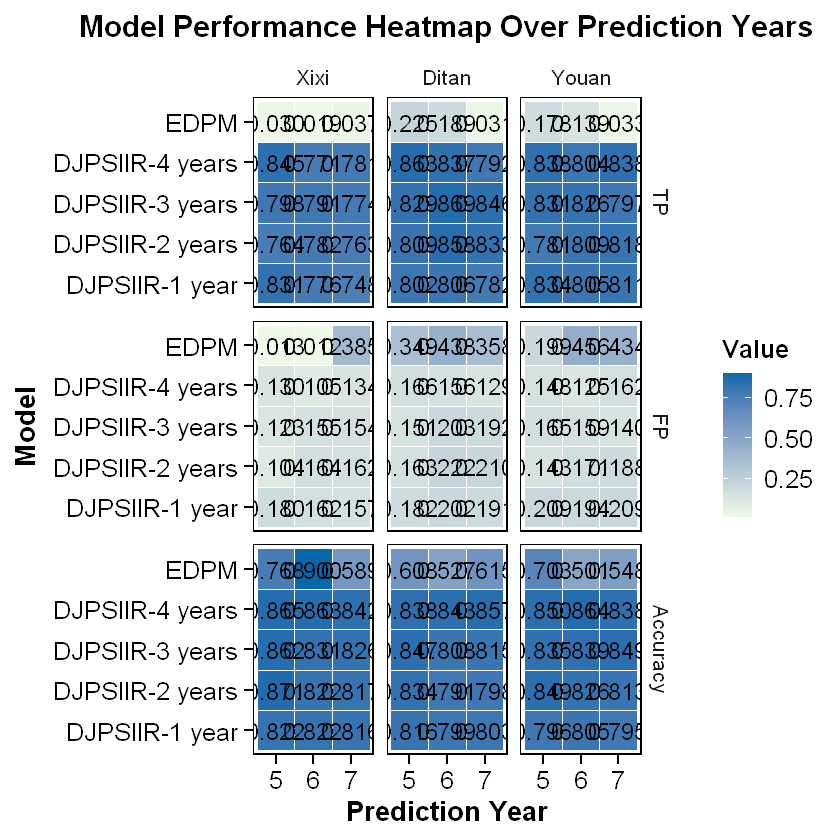

In [8]:
# Heatmap Plotting
library(ggplot2)
library(dplyr)
library(grid)

theme_paper <- theme_minimal(base_size = 16, base_family = "sans") +
  theme(
    plot.title = element_text(size=18, face="bold", hjust=0.5),
    axis.title = element_text(size=16, face="bold"),
    axis.text = element_text(size=15, color="black"),
    legend.title = element_text(size=15, face="bold"),
    legend.text = element_text(size=15),
    panel.grid.major = element_line(color = "#ffffff"),
    panel.grid.minor = element_blank(),
    axis.ticks = element_line(linewidth=0.7),
    axis.ticks.length = unit(0.2, "cm")
  )
theme_both_line <- theme_paper +
  theme(
    panel.border = element_rect(color = "black", fill = NA, linewidth = 0.7)
  )

df_long <- read.csv("C:/path/long_format_result.csv", stringsAsFactors = FALSE)

df_plot <- df_long %>%
  filter(Prediction.year %in% c("5", "6", "7") | Prediction.year %in% 5:7) %>%
  mutate(
    Prediction.year = as.factor(Prediction.year),
    Value_label = sprintf("%.3f", Value)
  )

df_plot <- df_plot %>%
  mutate(
    Dataset = factor(Dataset, levels = c("Xixi", "Ditan", "Youan")),
    Metric = factor(Metric, levels = c("TP", "FP", "Accuracy"))
  )

p <- ggplot(df_plot, aes(
    x = Prediction.year,
    y = Model,
    fill = Value)
  ) +
  geom_tile(color = "white", linewidth = 0.5) +
  geom_text(aes(label = Value_label), color = "black", size = 5) +
  facet_grid(Metric ~ Dataset) +
  scale_fill_gradient(low = "#F0F9E8", high = "#0868AC", name = "Value") +
  labs(
    title = "Model Performance Heatmap Over Prediction Years",
    x = "Prediction Year",
    y = "Model"
  ) +
  theme_both_line

print(p)
# Save the heatmap as a PDF file
ggsave("C:/path/model_performance_heatmap.pdf",
       plot = p, width = 14, height = 10, dpi = 600, units = "in", family = "sans") 

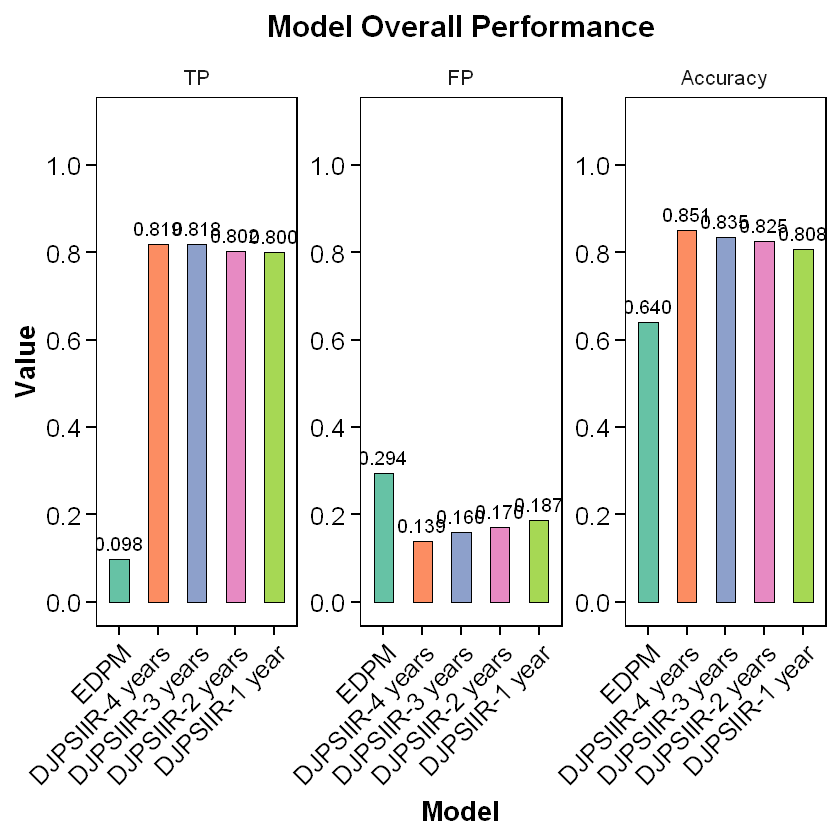

In [9]:
# Bar Plot for Model Performance
library(ggplot2)
library(dplyr)
library(grid)
library(tidyr)

theme_paper <- theme_minimal(base_size = 16, base_family = "sans") +
  theme(
    plot.title = element_text(size=18, face="bold", hjust=0.5),
    axis.title = element_text(size=16, face="bold"),
    axis.text = element_text(size=15, color="black"),
    legend.title = element_text(size=15, face="bold"),
    legend.text = element_text(size=15),
    panel.grid.major = element_line(color = "#ffffff"),
    panel.grid.minor = element_blank(),
    axis.ticks = element_line(linewidth=0.7),
    axis.ticks.length = unit(0.2, "cm")
  )
theme_both_line <- theme_paper +
  theme(
    panel.border = element_rect(color = "black", fill = NA, linewidth = 0.7)
  )

df_long <- read.csv("C:/path/long_format_result.csv", stringsAsFactors = FALSE)

Model_order <- c("EDPM", "DJPSIIR-4 years", "DJPSIIR-3 years", "DJPSIIR-2 years", "DJPSIIR-1 year")

df_bar <- df_long %>%
  filter(Dataset == "Mean", Prediction.year == "Overall") %>%
  mutate(
    Metric = factor(Metric, levels = c("TP", "FP", "Accuracy")),
    Model = factor(Model, levels = Model_order)
  )

bar_width <- 0.5 
label_fontsize <- 4 
y_axis_limits <- c(0, 1.1)  
y_axis_breaks <- seq(0, 1, by=0.2)  

p_bar <- ggplot(df_bar, aes(x = Model, y = Value, fill = Model)) +
  geom_bar(stat = "identity", width = bar_width, color = "black") +
  geom_text(aes(label = sprintf("%.3f", Value)), 
            vjust = -0.6, size = label_fontsize) +
  facet_wrap(~ Metric, nrow = 1, scales = "free_y") +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Model Overall Performance",
    x = "Model",
    y = "Value"
  ) +
  scale_y_continuous(limits = y_axis_limits, breaks = y_axis_breaks) +
  theme_both_line +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

print(p_bar)

ggsave(
  "C:/path/model_performance_bar.pdf",
  plot = p_bar, width = 14, height = 6, dpi = 600
)

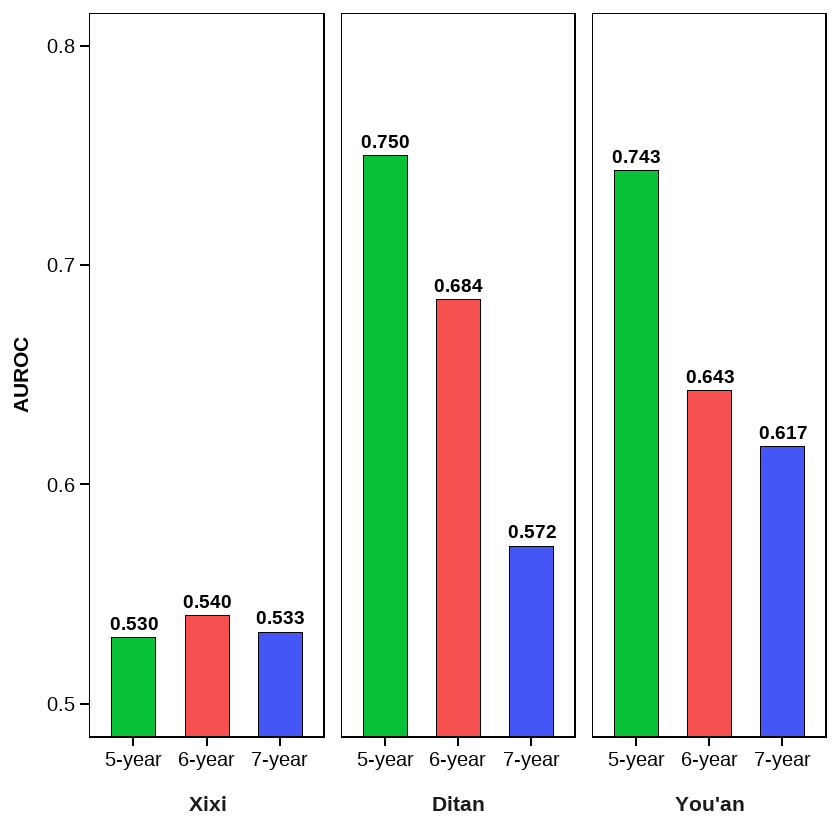

In [19]:
# AUROC Bar Plot for Three Hospitals
library(ggplot2)

df <- data.frame(
  Hospital = rep(c("Xixi", "Ditan", "You'an"), each = 3),
  Year = factor(rep(c("5-year", "6-year", "7-year"), times = 3), 
                levels = c("5-year", "6-year", "7-year"), ordered = TRUE),
  AUC = c(0.5302, 0.5404, 0.5329,
          0.7502, 0.6844, 0.5721,
          0.7431, 0.6429, 0.6173)
)
df$Hospital <- factor(df$Hospital, levels = c("Xixi", "Ditan", "You'an"), ordered = TRUE)

theme_paper <- theme_minimal(base_size = 16, base_family = "sans") +
  theme(
    plot.title = element_text(size=18, face="bold", hjust=0.5),
    axis.title = element_text(size=16, face="bold"),
    axis.text = element_text(size=15, color="black"),
    legend.title = element_text(size=15, face="bold"),
    legend.text = element_text(size=15),
    panel.grid.major = element_line(color = "#ffffff"),
    panel.grid.minor = element_blank(),
    axis.ticks = element_line(linewidth=0.7),
    axis.ticks.length = unit(0.2, "cm")
  )
theme_both_line <- theme_paper +
  theme(
    strip.text.x = element_text(face = "bold", size = 16),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 0.7),
    strip.placement = "outside"
  )

p <- ggplot(df, aes(x = Year, y = AUC, fill = Year)) +
  geom_bar(stat = "identity", width = 0.6, color = "black") +
  geom_text(
    aes(label = sprintf("%.3f", AUC)), 
    vjust = -0.6, size = 5, fontface = "bold"
  ) +
  facet_grid(. ~ Hospital, switch = "x") +
  scale_fill_manual(
    values = c("5-year" = "#08c136", "6-year" = "#f65050", "7-year" = "#4456f6")
  ) +
  theme_both_line +
  labs(
    x = NULL,
    y = "AUROC",
    title = NULL
  ) +
  coord_cartesian(ylim = c(0.5, 0.8)) +
  theme(
    legend.position = "none",
    strip.background = element_blank(),
    panel.spacing = unit(0.7, "lines"),
    axis.text.x = element_text(angle = 0, hjust = 0.5, vjust = 1)
  )

print(p)

ggsave("C:/path/dotplot_auc_faceted.pdf",
       p, dpi = 600, width = 8, height = 4, units = "in")

In [10]:
## head to head experiment ##
# data loading and merging
library(readxl)
library(dplyr)

expert_files <- c(
  "C:/path/Q1.xlsx",
  "C:/path/Q2.xlsx",
  "C:/path/Q3.xlsx",
  "C:/path/Q4.xlsx",
  "C:/path/Q5.xlsx",
  "C:/path/Q6.xlsx",
  "C:/path/Q7.xlsx",
  "C:/path/Q8.xlsx",
  "C:/path/Q9.xlsx"
)

all_expert_data <- list()

for(i in seq_along(expert_files)){
  dat <- read_excel(expert_files[i])
  dat$NID <- as.character(dat$NID)
  expert <- gsub("-.*", "", expert_files[i])
  colnames(dat)[colnames(dat)=="5_IIR"] <- paste0(expert, "_5")
  colnames(dat)[colnames(dat)=="6_IIR"] <- paste0(expert, "_6")
  colnames(dat)[colnames(dat)=="7_IIR"] <- paste0(expert, "_7")
  dat <- dat[, c("NID", paste0(expert, "_5"), paste0(expert, "_6"), paste0(expert, "_7"))]
  all_expert_data[[i]] <- dat
}

merged_dat <- Reduce(function(x, y) full_join(x, y, by = "NID"), all_expert_data)

cols_5 <- grep("_5$", colnames(merged_dat), value=TRUE)
cols_6 <- grep("_6$", colnames(merged_dat), value=TRUE)
cols_7 <- grep("_7$", colnames(merged_dat), value=TRUE)

merged_dat$Group5_YearProportion <- rowMeans(merged_dat[, cols_5], na.rm=TRUE)
merged_dat$Group5_YearAssessment     <- as.integer(merged_dat$Group5_YearProportion >= 0.5)

merged_dat$Group6_YearProportion <- rowMeans(merged_dat[, cols_6], na.rm=TRUE)
merged_dat$Group6_YearAssessment     <- as.integer(merged_dat$Group6_YearProportion >= 0.5)

merged_dat$Group7_YearProportion <- rowMeans(merged_dat[, cols_7], na.rm=TRUE)
merged_dat$Group7_YearAssessment     <- as.integer(merged_dat$Group7_YearProportion >= 0.5)

In [11]:
# Fleiss' Kappa Calculation
install.packages("irr")
library(irr)

df_5 <- merged_dat[, cols_5]
df_6 <- merged_dat[, cols_6]
df_7 <- merged_dat[, cols_7]

cat("5-Year IIR Expert Consensus（Fleiss' Kappa）:\n")
print(kappam.fleiss(df_5))
cat("6-Year IIR Expert Consensus（Fleiss' Kappa）:\n")
print(kappam.fleiss(df_6))
cat("7-Year IIR Expert Consensus（Fleiss' Kappa）:\n")
print(kappam.fleiss(df_7))

write.csv(merged_dat, 
          "C:/path/Expert_Consistency.csv", 
          row.names=FALSE)

package 'irr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LF\AppData\Local\Temp\RtmpG8sv9K\downloaded_packages


Loading required package: lpSolve



5-Year IIR Expert Consensus（Fleiss' Kappa）:
 Fleiss' Kappa for m Raters

 Subjects = 119 
   Raters = 9 
    Kappa = 0.379 

        z = 24.8 
  p-value = 0 
6-Year IIR Expert Consensus（Fleiss' Kappa）:
 Fleiss' Kappa for m Raters

 Subjects = 119 
   Raters = 9 
    Kappa = 0.367 

        z = 24 
  p-value = 0 
7-Year IIR Expert Consensus（Fleiss' Kappa）:
 Fleiss' Kappa for m Raters

 Subjects = 118 
   Raters = 9 
    Kappa = 0.355 

        z = 23.1 
  p-value = 0 


In [12]:
library(readxl)
library(dplyr)
library(tidyr)
library(readr)

model_df <- read_excel("C:/path/DJPSIIR_120.xlsx")

model_df <- model_df %>%
  mutate(NID = as.character(NID),
         year = as.character(follow.up.years)) %>%
  select(NID, year, true_label = IIR_3revi, predicted_label = `Predicted label 50%`)

expert_df <- read_csv("C:/path/Expert_Consistency.csv")

expert_df$NID <- as.character(expert_df$NID)

expert_long <- expert_df %>%
  select(NID, Group5_YearAssessment, Group6_YearAssessment, Group7_YearAssessment) %>%
  pivot_longer(
    cols = starts_with("Group"),
    names_to = "year",
    values_to = "Group_Assessment"
  ) %>%
  mutate(
    year = gsub("Group([567])_YearAssessment", "\\1", year) 
  )

merged_df <- left_join(model_df, expert_long, by = c("NID", "year"))

head(merged_df)

write.csv(merged_df, 
          "C:/path/merged_df.csv", 
          row.names=FALSE)

Rows: 120 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): NID
dbl (33): C:/path/Q1.xlsx_5, C:/path/Q1.xlsx_6, C:/path/Q1.xlsx_7, C:/path/Q...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


NID,year,true_label,predicted_label,Group_Assessment
<chr>,<chr>,<dbl>,<dbl>,<dbl>
NID1040590154246204943,5,0,0,1
NID1040590154246204943,6,0,0,1
NID1040590154246204943,7,0,0,1
NID1322037847048685506,5,0,0,0
NID1322037847048685506,6,0,1,0
NID1322037847048685506,7,0,1,0


In [ ]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(reshape2)

merged_df <- merged_df %>%
  filter(NID != "NID", NID != "", !is.na(NID)) %>%  
  distinct(NID, year, .keep_all = TRUE)  

cat("De-duplicated patient-year count:", nrow(merged_df), "\n")
cat("Unique NID count:", length(unique(merged_df$NID)), "\n")

plot_confmat <- function(cm_df, title, accuracy) {
  ggplot(cm_df, aes(x=factor(Reference), y=factor(Prediction), fill=Freq)) +
    geom_tile(color="white", size=1, alpha=0.85) +
    geom_text(aes(label=Freq), color="black", size=6, fontface="bold") +
    scale_fill_gradient(low="#FEE5E0", high="#A50F15") + 
    labs(
      x="True label",
      y="Predicted label",
      title=paste0(title, "\nAccuracy = ", sprintf("%.1f%%", accuracy*100))
    ) +
    theme_minimal(base_size = 15, base_family = "Arial") +
    theme(
      plot.title = element_text(size=16, face="bold", hjust=0.5),
      axis.title = element_text(size=15),
      axis.text = element_text(size=13),
      legend.position = "none",
      panel.grid = element_blank(),
      panel.border = element_rect(colour = "black", fill=NA, size=1)
    ) +
    scale_x_discrete(labels=c("0"="CIR","1"="IIR")) +
    scale_y_discrete(labels=c("0"="CIR","1"="IIR"))
}

plots_expert <- list()
plots_model  <- list()
acc_table    <- data.frame(Year=integer(0), Expert_Accuracy=double(0), Model_Accuracy=double(0), N=integer(0))

for(y in c("5", "6", "7")){
  dfy <- merged_df %>%
    filter(year == y & !is.na(true_label) & !is.na(Group_Assessment) & !is.na(predicted_label))

  acc_expert <- mean(dfy$Group_Assessment == dfy$true_label)
  acc_model  <- mean(dfy$predicted_label == dfy$true_label)

  acc_table <- rbind(acc_table, data.frame(Year=y, Expert_Accuracy=acc_expert, Model_Accuracy=acc_model, N=nrow(dfy)))

  cm_expert <- as.data.frame(table(Prediction=dfy$Group_Assessment, Reference=dfy$true_label))
  plots_expert[[y]] <- plot_confmat(cm_expert, paste0("Expert prediction (Year ", y, ")"), acc_expert)
  
  cm_model <- as.data.frame(table(Prediction=dfy$predicted_label, Reference=dfy$true_label))
  plots_model[[y]] <- plot_confmat(cm_model, paste0("DJPSIIR prediction (Year ", y, ")"), acc_model)
}

all_plots <- plot_grid(
  plots_expert[["5"]], plots_model[["5"]],
  plots_expert[["6"]], plots_model[["6"]],
  plots_expert[["7"]], plots_model[["7"]],
  nrow=3, ncol=2, labels = c("A1","A2","B1","B2","C1","C2")
)

ggsave("C:/path/expert_model_confusion_matrix_5_6_7year_en.svg", all_plots, width=10, height=15, device="svg", dpi=600)

acc_table$Expert_Accuracy <- sprintf("%.2f%%", acc_table$Expert_Accuracy*100)
acc_table$Model_Accuracy <- sprintf("%.2f%%", acc_table$Model_Accuracy*100)
print(acc_table)
cat("Patient count per year (N):\n")
print(acc_table[c("Year", "N")])

De-duplicated patient-year count: 360 


Unique NID count: 120 


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family 'Arial' not found in PostScript font database"
Warnin

  Year Expert_Accuracy Model_Accuracy   N
1    5          62.50%         80.83% 120
2    6          63.33%         84.17% 120
3    7          63.33%         85.00% 120
Patient count per year (N):
  Year   N
1    5 120
2    6 120
3    7 120


# code for figure 5B-5E

In [ ]:
# xixi cohort
# Data Preparation
df_drug_merge1 <- read.csv("C:/path/df_drug_merge1.csv")
df_final_surv <- read.csv("C:/path/df_final_surv.csv")

breaks <- c(-Inf, 30, 60, 90, Inf)
df_drug_merge1$B16_group <- cut(df_drug_merge1$B16, breaks = breaks, labels = FALSE, 
                                include.lowest = TRUE)
df_drug_merge1$B16_group <- addNA(df_drug_merge1$B16_group)
df_drug_merge1$B16_group <- as.integer(df_drug_merge1$B16_group)

df_drug_merge1 <- df_drug_merge1 %>% 
   select(-B16)

df_drug_long0 <- subset(df_drug_merge1, drug_trans == 0)
df_drug_long1 <- subset(df_drug_merge1, drug_trans == 1)
df_drug_surv0 <- dplyr::filter(df_final_surv, NID %in% df_drug_long0$NID)
df_drug_long0 <- dplyr::filter(df_drug_long0, NID %in% df_drug_surv0$NID)
df_drug_surv1 <- dplyr::filter(df_final_surv, NID %in% df_drug_long1$NID)
df_drug_long1 <- dplyr::filter(df_drug_long1, NID %in% df_drug_surv1$NID)

In [ ]:
# Joint Model Fitting (non-switch group)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv0)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (switch group)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv1)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# ditan cohort
# Data Preparation
df_drug_ditan <- read.csv("C:/path/df_drug_ditan.csv")
ditan_final_surv <- read.csv("C:/path/ditan_final_surv.csv")
df_drug_long0 <- subset(df_drug_ditan, drug_trans == 0)
df_drug_long1 <- subset(df_drug_ditan, drug_trans == 1)
df_drug_surv0 <- dplyr::filter(ditan_final_surv, NID %in% df_drug_long0$NID)
df_drug_long0 <- dplyr::filter(df_drug_long0, NID %in% df_drug_surv0$NID)
df_drug_surv1 <- dplyr::filter(ditan_final_surv, NID %in% df_drug_long1$NID)
df_drug_long1 <- dplyr::filter(df_drug_long1, NID %in% df_drug_surv1$NID)

In [ ]:
# Joint Model Fitting (non-switch group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv0)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (switch group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv1)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# youan cohort
# Data Preparation
df_drug_youan <- read.csv("C:/path/df_drug_youan.csv")
youan_final_surv <- read.csv("C:/path/youan_final_surv.csv")
df_drug_long0 <- subset(df_drug_youan, drug_trans == 0)
df_drug_long1 <- subset(df_drug_youan, drug_trans == 1)
df_drug_surv0 <- dplyr::filter(youan_final_surv, NID %in% df_drug_long0$NID)
df_drug_long0 <- dplyr::filter(df_drug_long0, NID %in% df_drug_surv0$NID)
df_drug_surv1 <- dplyr::filter(youan_final_surv, NID %in% df_drug_long1$NID)
df_drug_long1 <- dplyr::filter(df_drug_long1, NID %in% df_drug_surv1$NID)

df_drug_surv0 <- df_drug_surv0[order(df_drug_surv0$NID), ]
df_drug_surv1 <- df_drug_surv1[order(df_drug_surv1$NID), ]
df_drug_long0 <- df_drug_long0[order(df_drug_long0$NID, df_drug_long0$follow.up.years), ]
df_drug_long1 <- df_drug_long1[order(df_drug_long1$NID, df_drug_long1$follow.up.years), ]

In [ ]:
# Joint Model Fitting (non-switch group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv0)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "nlminb", maxIter = 1000, msMaxIter = 1000, msMaxEval = 2000))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long0, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "nlminb", maxIter = 1000, msMaxIter = 1000, msMaxEval = 2000))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (switch group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv1)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long1, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long0, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (switch group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long1, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# xixi cohort
# Data Preparation
df_drug_merge2 <- read.csv("C:/path/df_drug_merge2.csv")
df_final_surv <- read.csv("C:/path/df_final_surv.csv")

breaks <- c(-Inf, 30, 60, 90, Inf)
df_drug_merge2$B16_group <- cut(df_drug_merge2$B16, breaks = breaks, labels = FALSE, 
                                include.lowest = TRUE)
df_drug_merge2$B16_group <- addNA(df_drug_merge2$B16_group)
df_drug_merge2$B16_group <- as.integer(df_drug_merge2$B16_group)

df_drug_merge2 <- df_drug_merge2 %>% 
   select(-B16)

df_drug_longn15 <- subset(df_drug_merge2, F.anti_drug != 15)
df_drug_long15 <- subset(df_drug_merge2, F.anti_drug == 15)
df_drug_longn15 <- na.omit(df_drug_longn15)
df_drug_long15 <- na.omit(df_drug_long15)
df_drug_survn15 <- dplyr::filter(df_final_surv, NID %in% df_drug_longn15$NID)
df_drug_longn15 <- dplyr::filter(df_drug_longn15, NID %in% df_drug_survn15$NID)
df_drug_surv15 <- dplyr::filter(df_final_surv, NID %in% df_drug_long15$NID)
df_drug_long15 <- dplyr::filter(df_drug_long15, NID %in% df_drug_surv15$NID)


In [ ]:
# Joint Model Fitting (non-EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_survn15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# ditan cohort
# Data Preparation
df_drug_ditan <- read.csv("C:/path/df_drug_ditan.csv")
ditan_final_surv <- read.csv("C:/path/ditan_final_surv.csv")
df_drug_longn15 <- subset(df_drug_ditan, F34 != 15)
df_drug_long15 <- subset(df_drug_ditan, F34 == 15)
df_drug_longn15 <- na.omit(df_drug_longn15)
df_drug_long15 <- na.omit(df_drug_long15)
df_drug_survn15 <- dplyr::filter(ditan_final_surv, NID %in% df_drug_longn15$NID)
df_drug_longn15 <- dplyr::filter(df_drug_longn15, NID %in% df_drug_survn15$NID)
df_drug_surv15 <- dplyr::filter(ditan_final_surv, NID %in% df_drug_long15$NID)
df_drug_long15 <- dplyr::filter(df_drug_long15, NID %in% df_drug_surv15$NID)

In [ ]:
# Joint Model Fitting (non-EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_survn15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# youan cohort
# Data Preparation
df_drug_youan <- read.csv("C:/path/df_drug_youan.csv")
youan_final_surv <- read.csv("C:/path/youan_final_surv.csv")
df_drug_longn15 <- subset(df_drug_youan, F34 != 15)
df_drug_long15 <- subset(df_drug_youan, F34 == 15)
df_drug_longn15 <- na.omit(df_drug_longn15)
df_drug_long15 <- na.omit(df_drug_long15)
df_drug_survn15 <- dplyr::filter(youan_final_surv, NID %in% df_drug_longn15$NID)
df_drug_longn15 <- dplyr::filter(df_drug_longn15, NID %in% df_drug_survn15$NID)
df_drug_surv15 <- dplyr::filter(youan_final_surv, NID %in% df_drug_long15$NID)
df_drug_long15 <- dplyr::filter(df_drug_long15, NID %in% df_drug_surv15$NID)

df_drug_survn15 <- df_drug_survn15[order(df_drug_survn15$NID), ]
df_drug_surv15 <- df_drug_surv15[order(df_drug_surv15$NID), ]
df_drug_longn15 <- df_drug_longn15[order(df_drug_longn15$NID, df_drug_longn15$follow.up.years), ]
df_drug_long15 <- df_drug_long15[order(df_drug_long15$NID, df_drug_long15$follow.up.years), ]

In [ ]:
# Joint Model Fitting (non-EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_survn15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_longn15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# Joint Model Fitting (EFV+TDF+3TC drug group)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_drug_surv15)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                 control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                 data = df_drug_long15, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                 control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# 5-7 year AUC  (non-EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_longn15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

In [ ]:
# 5-7 year AUC  (EFV+TDF+3TC group)
roc_result15 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 5)
roc_result25 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 5)
roc_result35 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 5)
roc_result45 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 5)

roc_result16 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 6)
roc_result26 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 6)
roc_result36 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 6)
roc_result46 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 6)

roc_result17 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 1, Thoriz = 7)
roc_result27 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 2, Thoriz = 7)
roc_result37 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 3, Thoriz = 7)
roc_result47 <- tvROC(jmFitcox3.12, newdata = df_drug_long15, Tstart = 4, Thoriz = 7)

print(tvAUC(roc_result15))
print(tvAUC(roc_result25))
print(tvAUC(roc_result35))
print(tvAUC(roc_result45))
print(tvAUC(roc_result16))
print(tvAUC(roc_result26))
print(tvAUC(roc_result36))
print(tvAUC(roc_result46))
print(tvAUC(roc_result17))
print(tvAUC(roc_result27))
print(tvAUC(roc_result37))
print(tvAUC(roc_result47))

# code for figure 6

In [ ]:
load("data9.Rdata")

In [ ]:
# data preparation
breaks <- c(-Inf, 30, 60, 90, Inf)
df_final_long$B16_group <- cut(df_final_long$B16, breaks = breaks, labels = FALSE, include.lowest = TRUE)
df_final_long$B16_group <- addNA(df_final_long$B16_group)
df_final_long$B16_group <- as.integer(df_final_long$B16_group)

df_final_long <- df_final_long %>% 
   select(-B16)

df_final_surv$IIR_3revi <- as.numeric(df_final_surv$IIR_3revi)
df_final_surv$time1 <- as.numeric(df_final_surv$time1)
df_final_surv$B19_group <- as.factor(df_final_surv$B19_group)
df_final_long$B12_group <- as.factor(df_final_long$B12_group)
df_final_long$B18_group <- as.factor(df_final_long$B18_group)
df_final_long$B10_group <- as.factor(df_final_long$B10_group)
df_final_long$B16_group <- as.factor(df_final_long$B16_group)

In [ ]:
# Joint Model Fitting (based on xixi data)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+AGE_10, data = df_final_surv)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")
summary(jmFitcox3.12)

In [ ]:
# Extract Posterior Sample Moments (Final Joint Model)
posterior_means <- c(
  B9 = -0.0008,
  B19_group2 = -0.0328,
  B19_group3 = -0.1259,
  B19_group4 = 0.2300,
  B19_group5 = -0.0535,
  AGE_10 = -0.0657,
  value_F2 = -0.0135,
  value_CD4CD8 = 0.4436
)

posterior_stds <- c(
  B9 = 0.0006,
  B19_group2 = 0.1255,
  B19_group3 = 0.2087,
  B19_group4 = 0.3708,
  B19_group5 = 0.2826,
  AGE_10 = 0.0373,
  value_F2 = 0.0007,
  value_CD4CD8 = 0.1527
)

# Standardized Coefficient Calculation
standardized_coefficients <- posterior_means / posterior_stds

standardized_coefficients_df <- data.frame(
  Variable = names(standardized_coefficients),
  Standardized_Coefficient = standardized_coefficients
)

# Display the standardized coefficients
standardized_coefficients_df

In [ ]:
# Extract Posterior Sample Moments (CD4 Trajectory Fitting Model)
posterior_means <- c(
  Intercept = 247.8694,
  n_2_B_0_6_7_1 = 326.8433,
  n_2_B_0_6_7_2 = 124.3215,
  B9 = 0.8212,
  B82 = -38.9098,
  B12_group2 = 8.8016,
  B12_group3 = 4.2106,
  B12_group4 = 31.1392,
  B12_group5 = -1.7701,
  B18_group2 = 22.1619,
  B18_group3 = 15.7406,
  B18_group4 = 38.9550,
  B10_group2 = 11.8426,
  B10_group3 = 9.8343,
  B10_group4 = -20.0427,
  AGE_10 = -9.0825,
  B16_group2 = -56.5071,
  B16_group3 = -65.9217,
  sigma = 105.1390
)
posterior_stds <- c(
  Intercept = 20.2085,
  n_2_B_0_6_7_1 = 5.2841,
  n_2_B_0_6_7_2 = 2.5863,
  B9 = 0.0141,
  B82 = 5.5190,
  B12_group2 = 7.5803,
  B12_group3 = 7.0999,
  B12_group4 = 7.0200,
  B12_group5 = 6.7995,
  B18_group2 = 5.4264,
  B18_group3 = 5.6499,
  B18_group4 = 15.3728,
  B10_group2 = 6.2980,
  B10_group3 = 7.8467,
  B10_group4 = 8.3420,
  AGE_10 = 1.6995,
  B16_group2 = 22.4738,
  B16_group3 = 19.5666,
  sigma = 0.2988
)
# Standardized Coefficient Calculation
standardized_coefficients <- posterior_means / posterior_stds
standardized_coefficients_df <- data.frame(
  Variable = names(standardized_coefficients),
  Standardized_Coefficient = standardized_coefficients
)
# Display the standardized coefficients
standardized_coefficients_df

In [ ]:
# Extract Posterior Sample Moments (CD4/CD8 Trajectory Fitting Model)
posterior_means <- c(
  Intercept = 0.0961,
  n_2_B_0_6_4_1 = 0.6427,
  n_2_B_0_6_4_2 = 0.2598,
  B22 = 0.0854,
  AGE_10 = 0.0139,
  B252 = 0.0545,
  B253 = 0.0526,
  B12_group2 = -0.0120,
  B12_group3 = 0.0239,
  B12_group4 = 0.0572,
  B12_group5 = -0.0058,
  B16_group2 = 0.1707,
  B16_group3 = 0.1572,
  B9 = 0.0010,
  B82 = -0.1011,
  B10_group2 = -0.1815,
  B10_group3 = -0.4025,
  B10_group4 = -0.2456,
  sigma = 0.1550
)
posterior_stds <- c(
  Intercept = 0.2147,
  n_2_B_0_6_4_1 = 0.0083,
  n_2_B_0_6_4_2 = 0.0042,
  B22 = 0.0160,
  AGE_10 = 0.0035,
  B252 = 0.0366,
  B253 = 0.0382,
  B12_group2 = 0.0164,
  B12_group3 = 0.0155,
  B12_group4 = 0.0153,
  B12_group5 = 0.0151,
  B16_group2 = 0.2129,
  B16_group3 = 0.2092,
  B9 = 0.0000,
  B82 = 0.0112,
  B10_group2 = 0.0131,
  B10_group3 = 0.0166,
  B10_group4 = 0.0176,
  sigma = 0.0004
)
# Standardized Coefficient Calculation
standardized_coefficients <- posterior_means / posterior_stds
standardized_coefficients_df <- data.frame(
  Variable = names(standardized_coefficients),
  Standardized_Coefficient = standardized_coefficients
)
# Display the standardized coefficients
standardized_coefficients_df

In [ ]:
# figure 6D-6G
# example ID: NID1012971238371722386 from xixi cohort

# 1 year trajectory
t0 <- 1
ND <- df_final_long[df_final_long$NID %in% c("NID1012971238371722386"), ]
ND <- ND[ND$follow.up.years < t0, ]
ND$IIR_3revi <- 0
ND$time1 <- t0

# predictions
predLong1 <- predict(jmFitcox3.12, newdata = ND, return_newdata = TRUE)
predLong2 <- predict(jmFitcox3.12, newdata = ND,
                     times = seq(t0, 8.48, length.out = 51),
                     return_newdata = TRUE)
predSurv <- predict(jmFitcox3.12, newdata = ND, process = "event",
                    times = seq(t0, 8.48, length.out = 51),
                    return_newdata = TRUE)
# plotting
cols <- c('#1f1090', '#080005')
p <- plot(predLong2, predSurv, outcomes = 1:2, subject = "NID1012971238371722386",
     fun_long = list(identity, identity),
     fun_event = function (x) 1 - x,
     ylab_event = "Survival Probabilities",
     ylab_long = c("CD4", "CD4/CD8"),
     bg = '#fdfdfe', col_points = cols, col_line_long = cols,
     col_line_event = '#f80404', col_axis = "#080808", 
     fill_CI_long = NULL,
     fill_CI_event = NULL, 
     pos_ylab_long = c(1000, 2.5))

print(p)

Warning message in rep(fill_CI_long, length.out = n_outcomes):
"'x' is NULL so the result will be NULL"
Warning message in rep(fill_CI_event, length.out = length(unq_strata)):
"'x' is NULL so the result will be NULL"


NULL


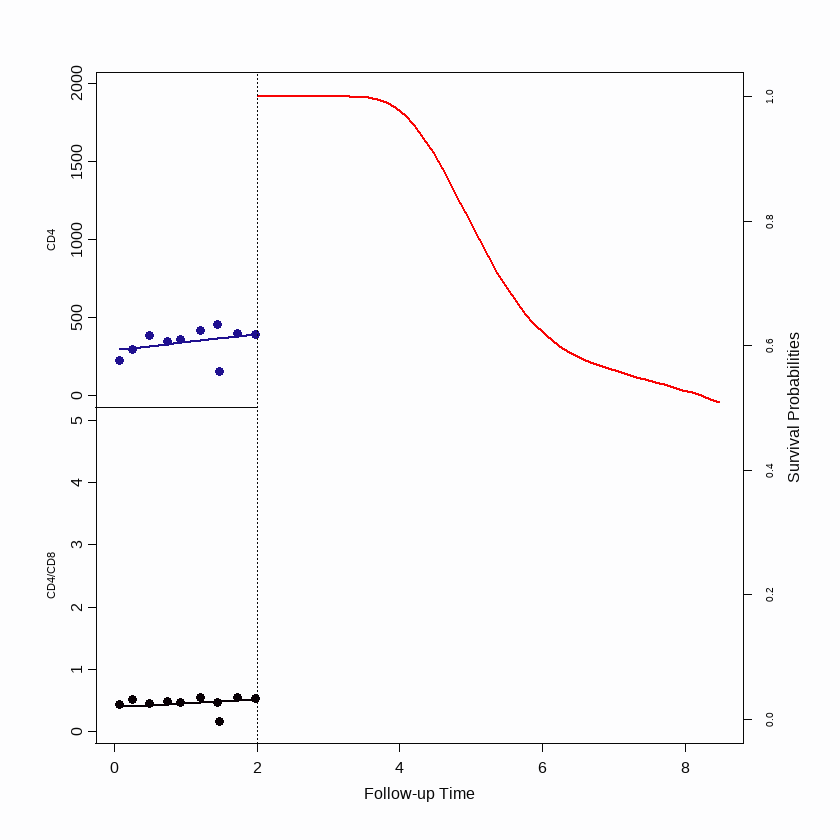

In [7]:
# example ID: NID1012971238371722386 from xixi cohort

# 2 year trajectory
t0 <- 2
ND <- df_final_long[df_final_long$NID %in% c("NID1012971238371722386"), ]
ND <- ND[ND$follow.up.years < t0, ]
ND$IIR_3revi <- 0
ND$time1 <- t0

# predictions
predLong1 <- predict(jmFitcox3.12, newdata = ND, return_newdata = TRUE)
predLong2 <- predict(jmFitcox3.12, newdata = ND,
                     times = seq(t0, 8.48, length.out = 51),
                     return_newdata = TRUE)
predSurv <- predict(jmFitcox3.12, newdata = ND, process = "event",
                    times = seq(t0, 8.48, length.out = 51),
                    return_newdata = TRUE)
# plotting
cols <- c('#1f1090', '#080005')
p <- plot(predLong2, predSurv, outcomes = 1:2, subject = "NID1012971238371722386",
     fun_long = list(identity, identity),
     fun_event = function (x) 1 - x,
     ylab_event = "Survival Probabilities",
     ylab_long = c("CD4", "CD4/CD8"),
     bg = '#fdfdfe', col_points = cols, col_line_long = cols,
     col_line_event = '#f80404', col_axis = "#080808", 
     fill_CI_long = NULL,
     fill_CI_event = NULL, 
     pos_ylab_long = c(1000, 2.5))

print(p)

Warning message in rep(fill_CI_long, length.out = n_outcomes):
"'x' is NULL so the result will be NULL"
Warning message in rep(fill_CI_event, length.out = length(unq_strata)):
"'x' is NULL so the result will be NULL"


NULL


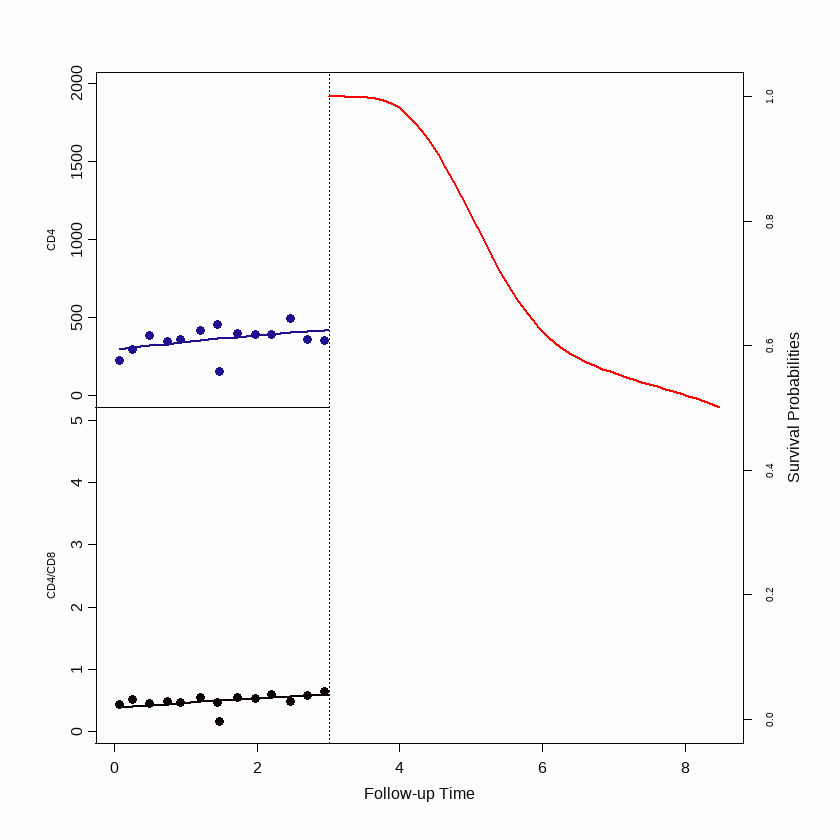

In [8]:
# example ID: NID1012971238371722386 from xixi cohort

# 3 year trajectory
t0 <- 3
ND <- df_final_long[df_final_long$NID %in% c("NID1012971238371722386"), ]
ND <- ND[ND$follow.up.years < t0, ]
ND$IIR_3revi <- 0
ND$time1 <- t0

# predictions
predLong1 <- predict(jmFitcox3.12, newdata = ND, return_newdata = TRUE)
predLong2 <- predict(jmFitcox3.12, newdata = ND,
                     times = seq(t0, 8.48, length.out = 51),
                     return_newdata = TRUE)
predSurv <- predict(jmFitcox3.12, newdata = ND, process = "event",
                    times = seq(t0, 8.48, length.out = 51),
                    return_newdata = TRUE)
# plotting
cols <- c('#1f1090', '#080005')
p <- plot(predLong2, predSurv, outcomes = 1:2, subject = "NID1012971238371722386",
     fun_long = list(identity, identity),
     fun_event = function (x) 1 - x,
     ylab_event = "Survival Probabilities",
     ylab_long = c("CD4", "CD4/CD8"),
     bg = '#fdfdfe', col_points = cols, col_line_long = cols,
     col_line_event = '#f80404', col_axis = "#080808", 
     fill_CI_long = NULL,
     fill_CI_event = NULL, 
     pos_ylab_long = c(1000, 2.5))

print(p)

Warning message in rep(fill_CI_long, length.out = n_outcomes):
"'x' is NULL so the result will be NULL"
Warning message in rep(fill_CI_event, length.out = length(unq_strata)):
"'x' is NULL so the result will be NULL"


NULL


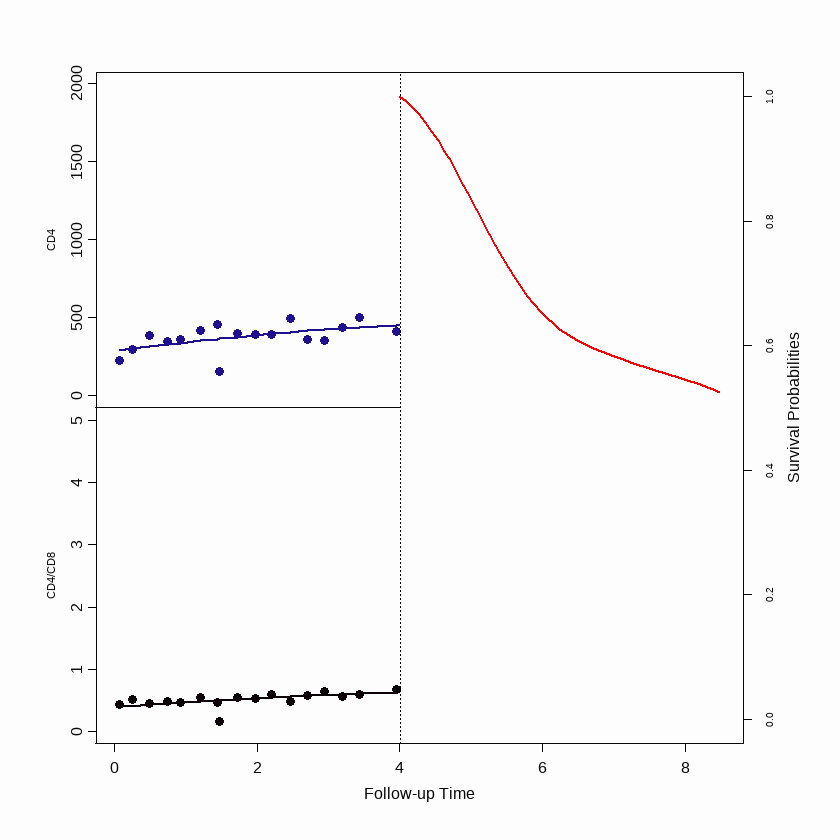

In [9]:
# example ID: NID1012971238371722386 from xixi cohort

# 4 year trajectory
t0 <- 4
ND <- df_final_long[df_final_long$NID %in% c("NID1012971238371722386"), ]
ND <- ND[ND$follow.up.years < t0, ]
ND$IIR_3revi <- 0
ND$time1 <- t0

# predictions
predLong1 <- predict(jmFitcox3.12, newdata = ND, return_newdata = TRUE)
predLong2 <- predict(jmFitcox3.12, newdata = ND,
                     times = seq(t0, 8.48, length.out = 51),
                     return_newdata = TRUE)
predSurv <- predict(jmFitcox3.12, newdata = ND, process = "event",
                    times = seq(t0, 8.48, length.out = 51),
                    return_newdata = TRUE)
# plotting
cols <- c('#1f1090', '#080005')
p <- plot(predLong2, predSurv, outcomes = 1:2, subject = "NID1012971238371722386",
     fun_long = list(identity, identity),
     fun_event = function (x) 1 - x,
     ylab_event = "Survival Probabilities",
     ylab_long = c("CD4", "CD4/CD8"),
     bg = '#fdfdfe', col_points = cols, col_line_long = cols,
     col_line_event = '#f80404', col_axis = "#080808", 
     fill_CI_long = NULL,
     fill_CI_event = NULL, 
     pos_ylab_long = c(1000, 2.5))

print(p)

# code for supplementary table 2 and figure 1

In [ ]:
# update models(AUROC and calibration curve calculations are similar to the code in Figure 3)
# all recorded values
jmFitcox3.12.value <- update(jmFitcox3.12, functional_forms = ~ value(F2) + value(CD4CD8))
# slopes derived from cumulative observations
jmFitcox3.12.slope <- update(jmFitcox3.12, functional_forms = ~ slope(F2) + slope(CD4CD8))
# combination of values and slopes
jmFitcox3.12.slope1 <- update(jmFitcox3.12, functional_forms = ~ value(F2) + slope(F2) 
                             + value(CD4CD8) + slope(CD4CD8))
# area under the curve (AUC) representing cumulative effects
jmFitcox3.12.area1 <- update(jmFitcox3.12, functional_forms = ~ area(F2) + area(CD4CD8))
# combination of values and AUC
jmFitcox3.12.area <- update(jmFitcox3.12, functional_forms = ~ value(F2) + area(F2) 
                         + value(CD4CD8) + area(CD4CD8))
# cross-sectional values at 4-year follow-up
# data preparation
df_surv_4 <- read.csv("C:/path/df_surv_4.csv")
df_long_4 <- read.csv("C:/path/df_long_4.csv")

df_surv_4$IIR_3revi <- as.numeric(df_surv_4$IIR_3revi)
df_surv_4$time1 <- as.numeric(df_surv_4$time1)
# model fitting
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19_group+BMI_group+AGE_10, data = df_surv_4)
lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+BMI_group+B18_group
                +B10_group+AGE_10+B16+F2_4+CD4CD8_4, 
                data = df_long_4, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16+B9
                +B8+B10_group+F2_4+CD4CD8_4, 
                data = df_long_4, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")


# code for supplementary table 5

In [ ]:
# xixi cohort
# Data Preparation
df_final_long <- read.csv("C:/path/df_final_long_TC.csv")
df_final_surv <- read.csv("C:/path/df_final_surv_TC.csv")
df_final_long <- df_final_long[!is.na(df_final_long$B19), ]

df_final_surv <- df_final_surv[!is.na(df_final_surv$B19), ]

breaks <- c(-Inf, 30, 60, 90, Inf)
df_final_long$B16_group <- cut(df_final_long$B16, breaks = breaks, labels = FALSE, include.lowest = TRUE)
df_final_long$B16_group <- addNA(df_final_long$B16_group)
df_final_long$B16_group <- as.integer(df_final_long$B16_group)

df_final_surv$IIR_3revi <- as.numeric(df_final_surv$IIR_3revi)
df_final_surv$time1 <- as.numeric(df_final_surv$time1)  

# Joint Model Fitting (based on xixi data)
CoxFit3 <- coxph(Surv(time1, IIR_3revi) ~ B9+B19+AGE_10, data = df_final_surv)

lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12 <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 5
jmFitcox3.12_roc15 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_roc25 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_roc35 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_roc45 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_roc15))
print(tvAUC(jmFitcox3.12_roc25))
print(tvAUC(jmFitcox3.12_roc35))
print(tvAUC(jmFitcox3.12_roc45))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 6
jmFitcox3.12_roc16 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_roc26 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_roc36 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_roc46 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_roc16))
print(tvAUC(jmFitcox3.12_roc26))
print(tvAUC(jmFitcox3.12_roc36))
print(tvAUC(jmFitcox3.12_roc46))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 7
jmFitcox3.12_roc17 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_roc27 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_roc37 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_roc47 <- tvROC(jmFitcox3.12, newdata = df_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_roc17))
print(tvAUC(jmFitcox3.12_roc27))
print(tvAUC(jmFitcox3.12_roc37))
print(tvAUC(jmFitcox3.12_roc47))

In [ ]:
# ditan cohort
# Data Preparation
df_final_long <- read.csv("C:/path/ditan_final_long_TC.csv")
df_final_surv <- read.csv("C:/path/ditan_final_surv_TC.csv")

df_final_surv$IIR_3revi <- as.numeric(df_final_surv$IIR_3revi)
df_final_surv$time1.new <- as.numeric(df_final_surv$time1.new) 

# Joint Model Fitting (based on ditan data)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19+AGE_10, data = df_final_surv)

lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12_ditan <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")


In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 5
jmFitcox3.12_ditan_roc15 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_ditan_roc25 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_ditan_roc35 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_ditan_roc45 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_ditan_roc15))
print(tvAUC(jmFitcox3.12_ditan_roc25))
print(tvAUC(jmFitcox3.12_ditan_roc35))
print(tvAUC(jmFitcox3.12_ditan_roc45))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 6
jmFitcox3.12_ditan_roc16 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_ditan_roc26 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_ditan_roc36 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_ditan_roc46 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_ditan_roc16))
print(tvAUC(jmFitcox3.12_ditan_roc26))
print(tvAUC(jmFitcox3.12_ditan_roc36))
print(tvAUC(jmFitcox3.12_ditan_roc46))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 7
jmFitcox3.12_ditan_roc17 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_ditan_roc27 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_ditan_roc37 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_ditan_roc47 <- tvROC(jmFitcox3.12_ditan, newdata = df_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_ditan_roc17))
print(tvAUC(jmFitcox3.12_ditan_roc27))
print(tvAUC(jmFitcox3.12_ditan_roc37))
print(tvAUC(jmFitcox3.12_ditan_roc47))

In [ ]:
# youan cohort
# Data Preparation
df_final_long <- read.csv("C:/path/youan_final_long_TC.csv")
df_final_surv <- read.csv("C:/path/youan_final_surv_TC.csv")

df_final_surv$IIR_3revi <- as.numeric(df_final_surv$IIR_3revi)
df_final_surv$time1.new <- as.numeric(df_final_surv$time1.new) 

# Joint Model Fitting (based on youan data)
CoxFit3 <- coxph(Surv(time1.new, IIR_3revi) ~ B9+B19+AGE_10, data = df_final_surv)

lmeFit1 <- lme(F2 ~ ns(follow.up.years, 2, B = c(0, 6.7))+B9+B8+B12_group+B18_group+B10_group+AGE_10+B16_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.7)) | NID,
                control = lmeControl(opt = "optim"))
lmeFit2 <- lme(CD4CD8 ~ ns(follow.up.years, 2, B = c(0, 6.4))+B2+AGE_10+B25+B12_group+B16_group+B9+B8+B10_group, 
                data = df_final_long, random = ~ ns(follow.up.years, 2, B = c(0, 6.4)) | NID,
                control = lmeControl(opt = "optim"))
jmFitcox3.12_youan <- jm(CoxFit3, list(lmeFit1, lmeFit2), time_var = "follow.up.years")

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 5
jmFitcox3.12_youan_roc15 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 1, Thoriz = 5)
jmFitcox3.12_youan_roc25 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 2, Thoriz = 5)
jmFitcox3.12_youan_roc35 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 3, Thoriz = 5)
jmFitcox3.12_youan_roc45 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 4, Thoriz = 5)

print(tvAUC(jmFitcox3.12_youan_roc15))
print(tvAUC(jmFitcox3.12_youan_roc25))
print(tvAUC(jmFitcox3.12_youan_roc35))
print(tvAUC(jmFitcox3.12_youan_roc45))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 6
jmFitcox3.12_youan_roc16 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 1, Thoriz = 6)
jmFitcox3.12_youan_roc26 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 2, Thoriz = 6)
jmFitcox3.12_youan_roc36 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 3, Thoriz = 6)
jmFitcox3.12_youan_roc46 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 4, Thoriz = 6)

print(tvAUC(jmFitcox3.12_youan_roc16))
print(tvAUC(jmFitcox3.12_youan_roc26))
print(tvAUC(jmFitcox3.12_youan_roc36))
print(tvAUC(jmFitcox3.12_youan_roc46))

In [ ]:
# tvROC,jmFitcox3.12,Thoriz = 7
jmFitcox3.12_youan_roc17 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 1, Thoriz = 7)
jmFitcox3.12_youan_roc27 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 2, Thoriz = 7)
jmFitcox3.12_youan_roc37 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 3, Thoriz = 7)
jmFitcox3.12_youan_roc47 <- tvROC(jmFitcox3.12_youan, newdata = df_final_long, Tstart = 4, Thoriz = 7)

print(tvAUC(jmFitcox3.12_youan_roc17))
print(tvAUC(jmFitcox3.12_youan_roc27))
print(tvAUC(jmFitcox3.12_youan_roc37))
print(tvAUC(jmFitcox3.12_youan_roc47))